In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

In [3]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

from data_loading import get_amazon_data
from evaluation import evaluate_policy, create_offline_dataset
from policies.bcmabrp import BCMABRP
from policies.cbrap import CBRAP
from policies.linucb import LinUCB
from policies.linear_ts import LinearTS
from policies.random import RandomPolicy
from policies.egreedy import EGreedy
from reduct_matrix import get_reduct_matrix

from sklearn.model_selection import train_test_split

In [4]:
PROJECT_DIR = '.'

In [5]:
# Reproducibility
seed = 42
np.random.seed(seed)

In [6]:
total_start_ts = time.time()

In [7]:
data = get_amazon_data()
(
    actions, action_features, action_biases, user_stream, true_user_features, user_features, user_biases, reward_list, ratings_list
) = data

In [8]:
times = 100000

In [9]:
thresholds = [1, 2, 3, 4, 5]
mean_rews = np.zeros(shape=(len(thresholds), len(actions)))
for i, threshold in enumerate(thresholds):
    data = get_amazon_data(threshold)
    (
        actions, action_features, action_biases, user_stream, true_user_features,
        user_features, user_biases, reward_list, ratings_list
    ) = data
    off_ctx, off_rew, contexts, rewards = create_offline_dataset(
        times, actions, action_features, user_stream, user_features, reward_list
    )
    mean_rew = rewards.mean(axis=0).flatten()
    mean_rews[i, :] = mean_rew
    del data
    del off_ctx, off_rew, contexts, rewards

First user in exp from 2015-12-26 01:00:00
Last user in exp from 2018-09-22 02:00:00
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
First user in exp from 2015-12-26 01:00:00
Last user in exp from 2018-09-22 02:00:00
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
First user in exp from 2015-12-26 01:00:00
Last user in exp from 2018-09-22 02:00:00
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
First user in exp from 2015-12-26 01:00:00
Last user in exp from 2018-09-22 02:00:00
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
First user in exp from 2015-12-26 01:00:00
Last user in exp from 2018-09-22 02:00:00
0
10000
20000
30000
40000
50000
60000
70000
80000
90000


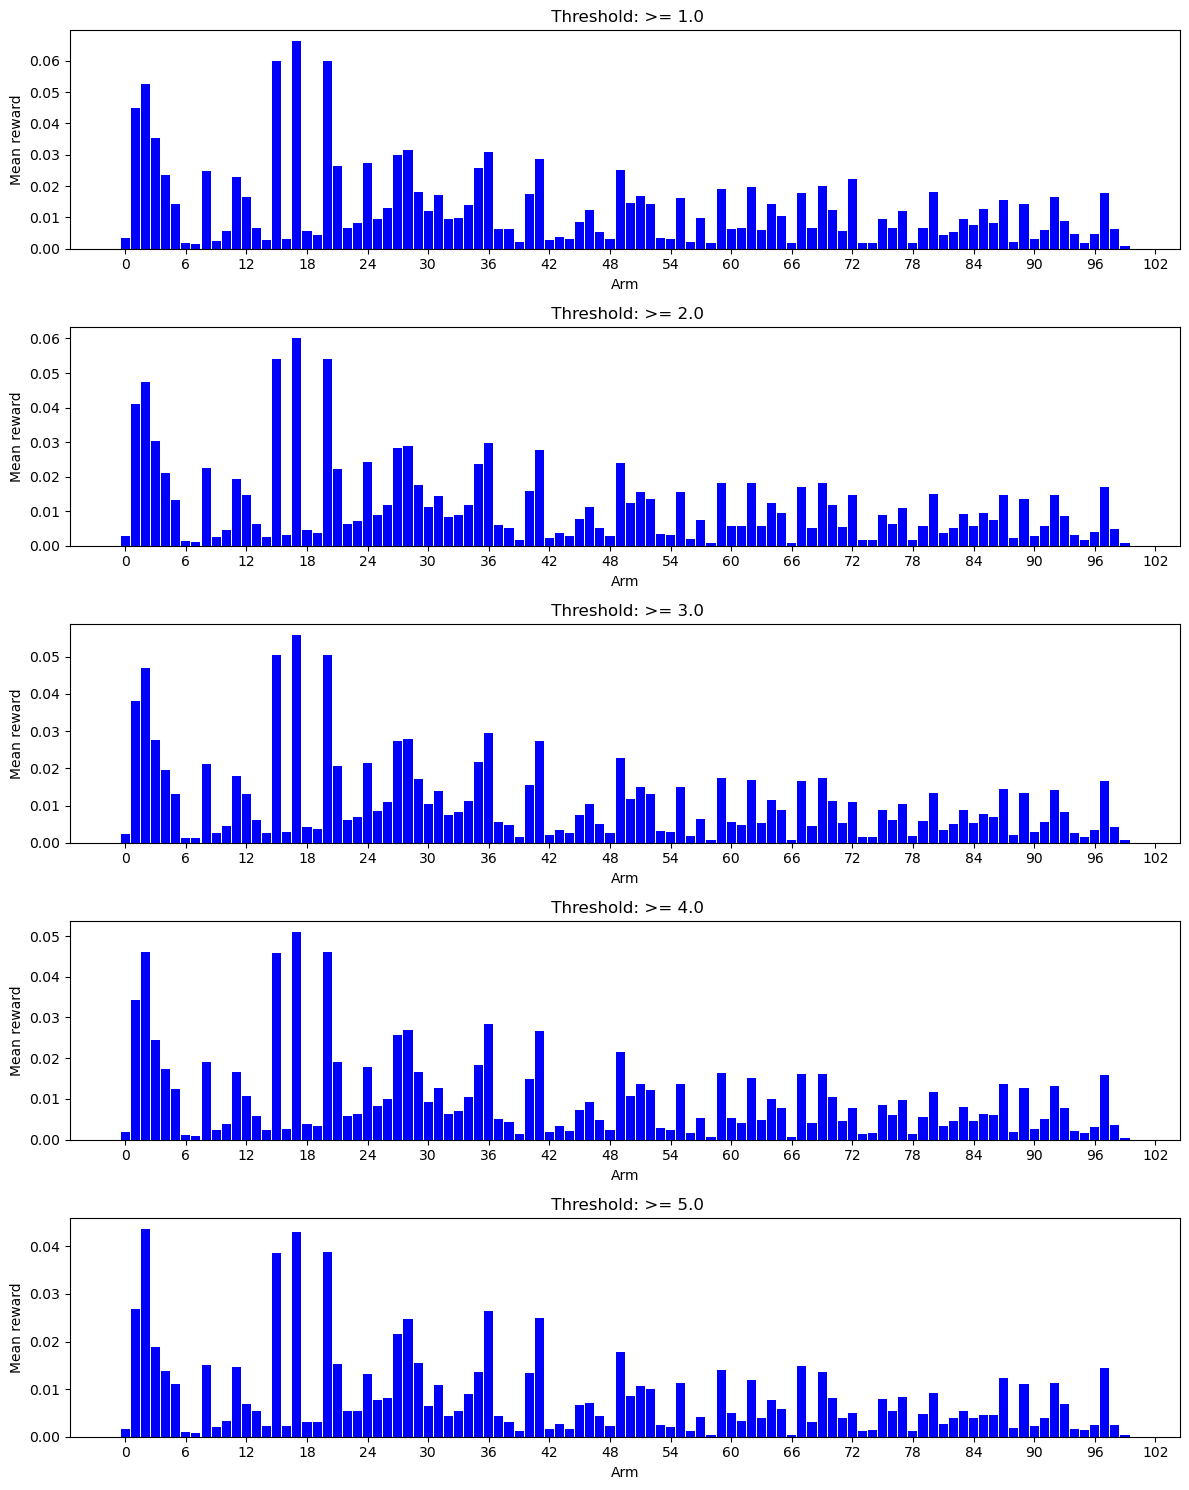

In [10]:
fig, axs = plt.subplots(5, 1, figsize=(12, 15))

for i, ax in enumerate(axs):
    ax.bar(x=list(range(len(mean_rews[i, :]))), height=mean_rews[i, :], color='b', width=0.9)
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.set_xlabel('Arm')
    ax.set_ylabel('Mean reward');
    ax.set_title(f" Threshold: >= {float(i+1)}")
    
plt.tight_layout()
plt.show()

In [11]:
print(f"Total time is {datetime.timedelta(seconds=time.time() - total_start_ts)}")

Total time is 0:07:38.013978
